In [1]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('Position_Salaries.csv')

In [3]:
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [4]:
# load the first five rows of the dataset
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
# load the last five rows of the dataset
data.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
# shape of the dataset
data.shape

(10, 3)

In [7]:
# To check if there are any NULL Values in the dataset
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

## So from the above observation, it is clear that there are no NULL Values in the dataset

In [21]:
# Divide the dataset into independent and dependent variables
X = data.drop(columns = ['Position','Salary'])
print(X)


Y = data['Salary']

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


In [22]:
print(Y)

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


In [29]:
X = data.iloc[:,1:2].values
print(X)

Y = data.iloc[:,2].values
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# As the dataset is very small in size, so it cannot be splitted into training and testing data

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
# call the object for the Random Forest
ran = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [32]:
# Train the model for Random Forest using the data
ran.fit(X, Y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [33]:
# predict the output for the data
Y_pred = ran.predict(X)
print(Y_pred)

[ 46000.  49000.  59000.  74000. 101000. 136000. 210000. 305000. 470000.
 850000.]


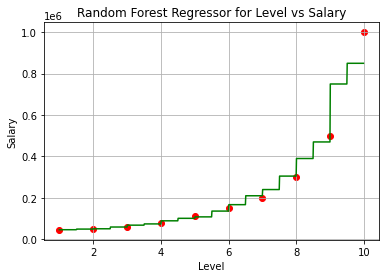

In [39]:
# Plotting the graph for Rnadom Forest Regressor
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
# Perform the scatter points between the data points
plt.scatter(X,Y, color = 'red')
# Plot the regression line between the data points
plt.plot(X_grid , ran.predict(X_grid), color = 'green')
# Title of the graph
plt.title('Random Forest Regressor for Level vs Salary')
# x-axis
plt.xlabel('Level')
# y-axis
plt.ylabel('Salary')
# grid of the line
plt.grid()
# display the graph
plt.show()

In [40]:
# To display the confusion matrix  between the actual output and the predicted output
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, Y_pred)
print(cm)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [41]:
# To display the accuracy score  between the actual output and the predicted output
from sklearn.metrics import accuracy_score
ac = accuracy_score(Y, Y_pred)
print("Accuracy of the model is:", ac)

Accuracy of the model is: 0.0


In [42]:
# To display the classification report  between the actual output and the predicted output
from sklearn.metrics import classification_report
cr = classification_report(Y, Y_pred)
print(cr)

              precision    recall  f1-score   support

     45000.0       0.00      0.00      0.00       1.0
     46000.0       0.00      0.00      0.00       0.0
     49000.0       0.00      0.00      0.00       0.0
     50000.0       0.00      0.00      0.00       1.0
     59000.0       0.00      0.00      0.00       0.0
     60000.0       0.00      0.00      0.00       1.0
     74000.0       0.00      0.00      0.00       0.0
     80000.0       0.00      0.00      0.00       1.0
    101000.0       0.00      0.00      0.00       0.0
    110000.0       0.00      0.00      0.00       1.0
    136000.0       0.00      0.00      0.00       0.0
    150000.0       0.00      0.00      0.00       1.0
    200000.0       0.00      0.00      0.00       1.0
    210000.0       0.00      0.00      0.00       0.0
    300000.0       0.00      0.00      0.00       1.0
    305000.0       0.00      0.00      0.00       0.0
    470000.0       0.00      0.00      0.00       0.0
    500000.0       0.00    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
